# Gerekli kütüphaneler 

In [98]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import math
from IPython.display import Audio, display
from scipy.io.wavfile import read # Ses dosyasının okunması için gerekli kütüphane
from IPython.lib.display import Audio
from noisereduce.noisereducev1 import reduce_noise
import noisereduce as nr
import parselmouth
from scipy.io import wavfile
import os

# Ses Dosyasında Gürültü Azaltma: scipy.io ve noisereduce Kütüphaneleri Kullanımı

In [106]:
# load data
rate, data = wavfile.read("test.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

Yukarıdaki kod, scipy.io ve noisereduce kütüphanelerini kullanarak ses dosyalarındaki gürültüyü azaltmayı göstermektedir.

İlk olarak, scipy.io modülünden wavfile fonksiyonunu ve noisereduce modülünü import ediyoruz.

Ardından, gürültüyü azaltmak istediğimiz ses dosyasını yüklüyoruz. Ses dosyasının adı "mywav.wav" olarak varsayılmıştır.
Ses dosyasını yükledikten sonra, nr.reduce_noise fonksiyonunu kullanarak gürültüyü azaltıyoruz. Bu fonksiyon, orijinal ses verilerini (data) ve örnekleme hızını (rate) parametre olarak alır ve gürültü azaltılmış veriyi döndürür.
Son olarak, wavfile.write fonksiyonunu kullanarak gürültü azaltılmış sesi "mywav_reduced_noise.wav" dosyasına kaydediyoruz. Bu fonksiyon, örnekleme hızını (rate), gürültü azaltılmış veriyi (reduced_noise) ve kaydedilecek dosyanın adını alır.
Bu basit Python kodu, scipy.io ve noisereduce kütüphanelerini kullanarak ses dosyalarındaki gürültüyü azaltmak için bir çözüm sunar. Bu kodu kullanarak gürültülü ses kayıtlarınızı temizleyebilir ve ses kalitesini artırabilirsiniz.

# cinsiyeti belirlemek için temel frekans (pitch) analizinin kullanımı

Ortalama ses yüksekliği sınırı: 125.48193953342823
115.73333196782697
Belirlenen ses cinsi: erkek


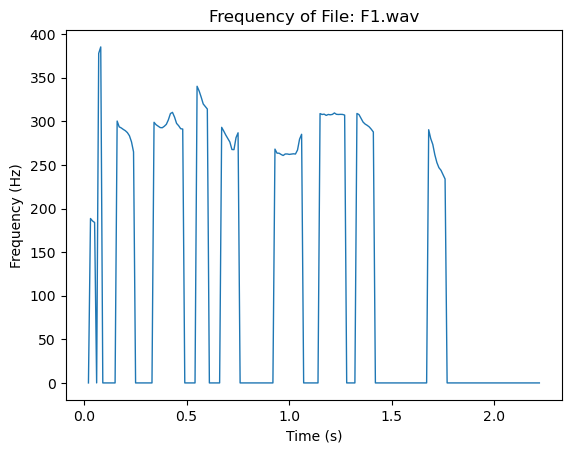

135.47974299181027
Belirlenen ses cinsi: kadın


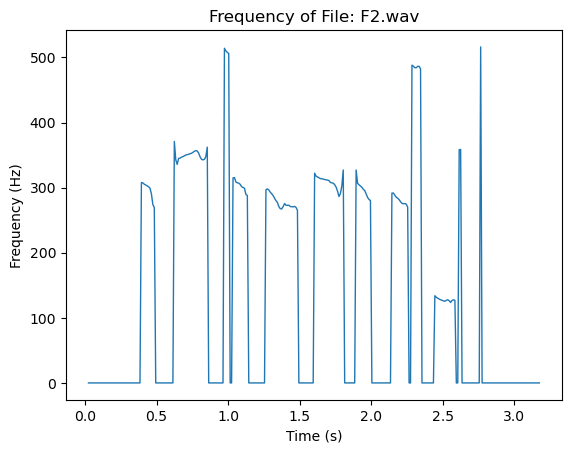

130.20059315627793
Data is too close to treshold
Belirlenen ses cinsi: kadın


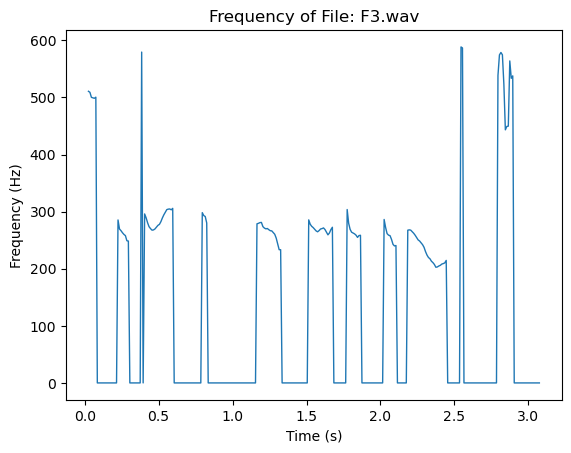

125.1326054647143
Data is too close to treshold
Belirlenen ses cinsi: erkek


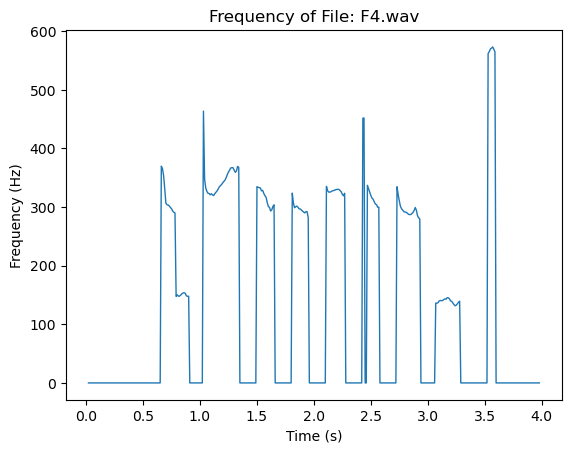

159.28777827542615
Belirlenen ses cinsi: kadın


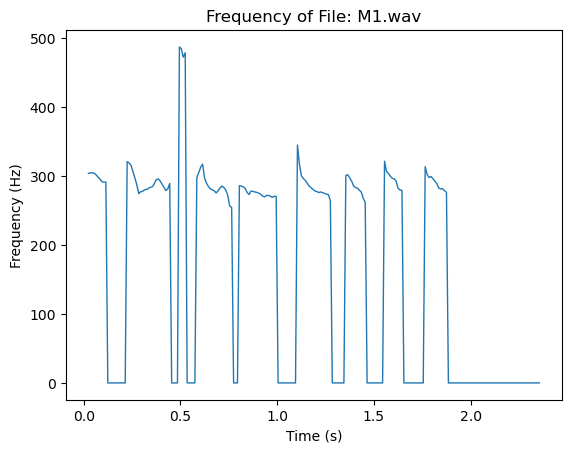

138.28783449885682
Belirlenen ses cinsi: kadın


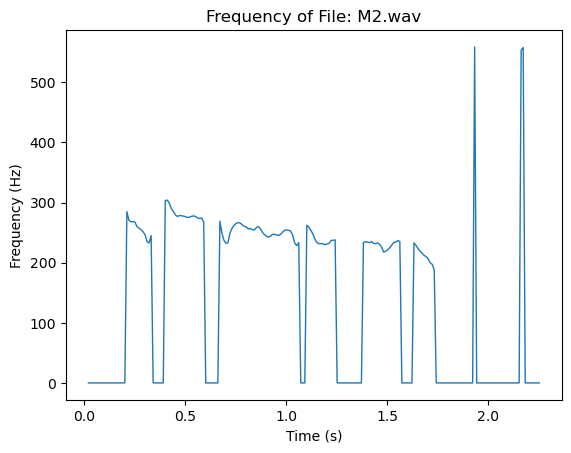

117.56163857924774
Data is too close to treshold
Belirlenen ses cinsi: erkek


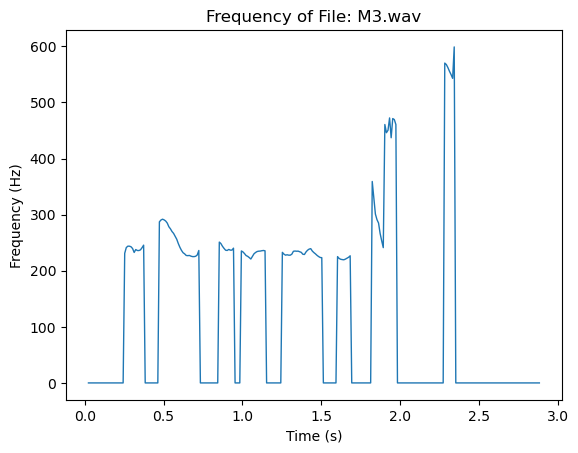

75.64175947954423
Belirlenen ses cinsi: erkek


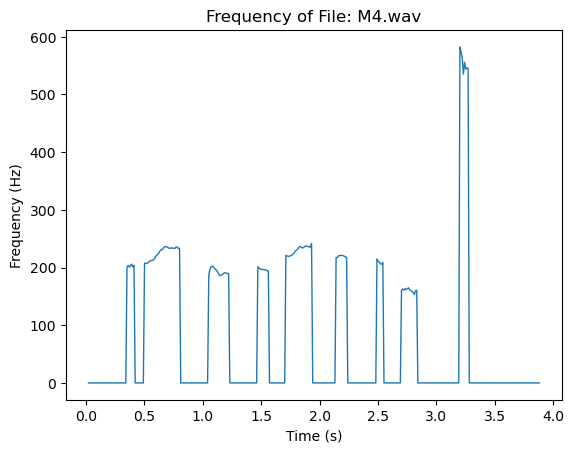

132.0121713871497
Data is too close to treshold
Belirlenen ses cinsi: kadın


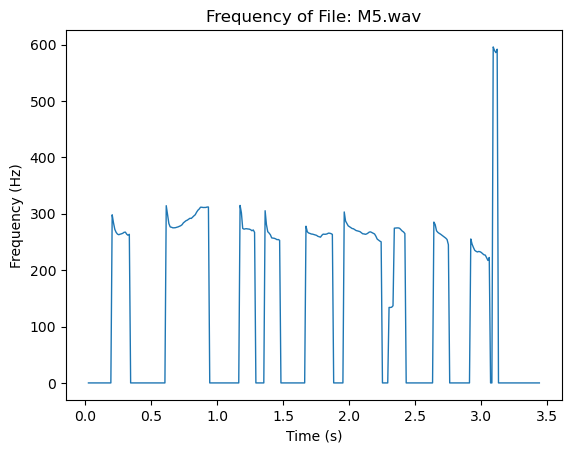

Data2 array: ['erkek', 'kadın', 'kadın', 'erkek', 'kadın', 'kadın', 'erkek', 'erkek', 'kadın']


In [107]:

import os
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def find_pitch(sound_file):
    sound = parselmouth.Sound(sound_file)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    mean_pitch = pitch_values.mean()
    return mean_pitch

def calculate_mean_pitch_in_folder(folder_path):
    file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.wav')]
    mean_pitch_sum = 0
    num_files = 0

    for file_path in file_paths:
        mean_pitch = find_pitch(file_path)
        mean_pitch_sum += mean_pitch
        num_files += 1

    if num_files > 0:
        mean_pitch_avg = mean_pitch_sum / num_files
        return mean_pitch_avg
    else:
        return None

def determine_gender(sound_file):
    sound = parselmouth.Sound(sound_file)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    mean_pitch = pitch_values.mean()
    print(mean_pitch)
    if mean_pitch > mean_pitch_threshold - 8 and mean_pitch < mean_pitch_threshold + 8:
        print("Data is too close to treshold")
    if mean_pitch < mean_pitch_threshold:
        return "erkek"
    else:
        return "kadın"

# Ses dosyalarının bulunduğu klasörün yolunu belirtin
klasor_yolu = "CleanVoice"

mean_pitch_threshold = calculate_mean_pitch_in_folder(klasor_yolu)
if mean_pitch_threshold is not None:
    print("Ortalama ses yüksekliği sınırı:", mean_pitch_threshold)
else:
    print("Klasörde WAV dosyası bulunamadı veya geçersiz dosya formatı.")

file_paths = [os.path.join(klasor_yolu, file) for file in os.listdir(klasor_yolu) if file.endswith('.wav')]

data2 = []  # Store output data

for file_path in file_paths:
    sonuc = determine_gender(file_path)
    print("Belirlenen ses cinsi:", sonuc)
    data2.append(sonuc)
    display(Audio(file_path))

    # Plot the frequency of the chosen file
    sound = parselmouth.Sound(file_path)
    pitch = sound.to_pitch()
    pitch_values = pitch.selected_array['frequency']
    time_points = pitch.xs()

    file_name = os.path.basename(file_path)
    plt.plot(time_points, pitch_values, linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Frequency of File: " + file_name)
    plt.show()

print("Data2 array:", data2)


İlk olarak, find_pitch fonksiyonu, verilen bir ses dosyasının frekansını (pitch) hesaplamak için parselmouth kütüphanesini kullanır. Daha sonra, hesaplanan frekans değerlerinden ortalama frekansı hesaplar ve bunu geri döndürür.

calculate_mean_pitch_in_folder fonksiyonu, belirli bir klasördeki WAV dosyalarını bulur ve her bir dosya için find_pitch fonksiyonunu çağırarak ortalama ses yüksekliğini hesaplar. Sonuçları toplar ve dosya sayısına böler ve bu şekilde ortalama ses yüksekliği sınırını elde eder. Eğer klasörde WAV dosyası bulunamazsa veya dosya formatı geçersizse None değeri döndürülür.

Daha sonra, determine_gender fonksiyonu, verilen bir ses dosyasının cinsiyetini belirlemek için find_pitch fonksiyonunu kullanır. Ses dosyasının ortalama ses yüksekliği, hesaplanan ortalama ses yüksekliği sınırıyla karşılaştırılır. Eğer ortalama ses yüksekliği sınırının altındaysa "Erkek sesi", aksi halde "Kadın sesi" olarak değerlendirilir.

Son olarak, örnek bir kullanım yapılarak belirli bir ses dosyasının cinsiyeti belirlenir ve sonuç ekrana yazdırılır.

Bu kod parçacığı, parselmouth kütüphanesini kullanarak ses dosyalarının frekans analizini gerçekleştirmektedir. Ayrıca, bir klasördeki ses dosyalarının ortalama ses yüksekliği sınırını hesaplayarak cinsiyet belirleme işleminde bir referans noktası sağlamaktadır.

# Genlik Spektrumu Max Değeri Üzerinden cinsiyet belirleme

In [108]:
def FindTheGender(directory):
    file_list = os.listdir(directory)
    total_max_amplitude = 0
    max_amplitude_values = []
    data = []
    count = 0

    for file_name in file_list:
        if file_name.endswith(".wav"):
            sound_file = os.path.join(directory, file_name)
            sound = parselmouth.Sound(sound_file)
            intensity = sound.to_intensity()
            max_amplitude = max(intensity.values.T)
            print(max_amplitude)
            max_amplitude_values.append(max_amplitude)
            total_max_amplitude += max_amplitude
            count += 1

            # Plot amplitude spectrum
            spectrum = np.fft.fft(sound.values.T)
            frequencies = np.fft.fftfreq(len(spectrum), 1 / sound.sampling_frequency)
            plt.plot(frequencies, np.abs(spectrum), linewidth=1)
            plt.xlabel("Frequency (Hz)")
            plt.ylabel("Amplitude")
            plt.title("Amplitude Spectrum of Audio File: " + file_name)
            plt.show()
            display(Audio(sound_file))
            
    if count > 0:
        average_max_amplitude = total_max_amplitude / count
        print("Ortalama: " + str(average_max_amplitude))
        
        for amplitude in max_amplitude_values:
            if amplitude > average_max_amplitude - 1 and amplitude < average_max_amplitude + 1:
                print("Data is too close to threshold")
            if amplitude > average_max_amplitude:
                data.append("erkek") 
                print("Erkek")
            else:
                data.append("kadın")
                print("Kadın")
    return data         

FindTheGender fonksiyonu, verilen klasördeki dosyaları kontrol eder ve sadece ".wav" uzantılı dosyaları işler. Her bir ses dosyası için parselmouth kütüphanesini kullanarak sesi yükler ve sesin şiddetini (intensity) hesaplar. Şiddetin maksimum değerini bulur ve bu değeri bir listeye ekler. Ayrıca, tüm dosyaların maksimum amplitüdünü toplar ve dosya sayısına böler, böylece ortalama maksimum amplitüdü elde eder.

Sonuç olarak, her bir ses dosyasının maksimum amplitüdü, ortalama maksimum amplitüdün üzerinde mi altında mı olduğuna göre "Erkek" veya "Kadın" olarak değerlendirilir. Bu değerlendirme sonucu ekrana yazdırılır.

Örneğin, FindTheGender fonksiyonu "CleanVoice" klasöründeki ses dosyalarının cinsiyetini belirlemek için kullanılmaktadır. Dosyaların maksimum amplitüdü ve ortalama maksimum amplitüdü ekrana yazdırılırken, her dosya için belirlenen cinsiyet sonucu da ayrı ayrı ekrana yazdırılır.

[81.09092337]


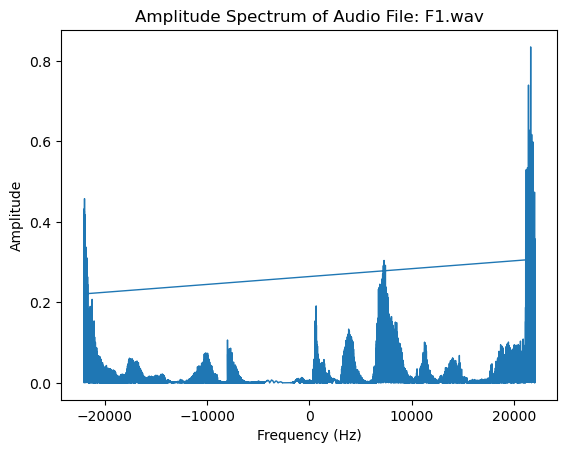

[82.82308684]


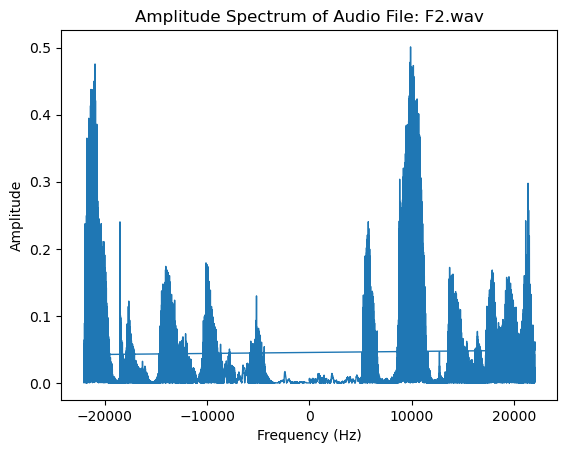

[79.79901255]


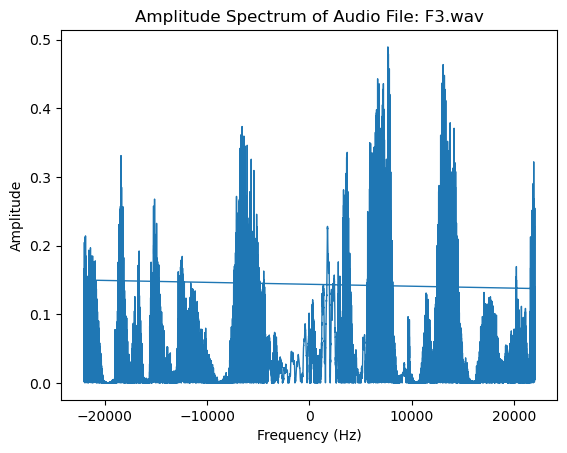

[79.6476949]


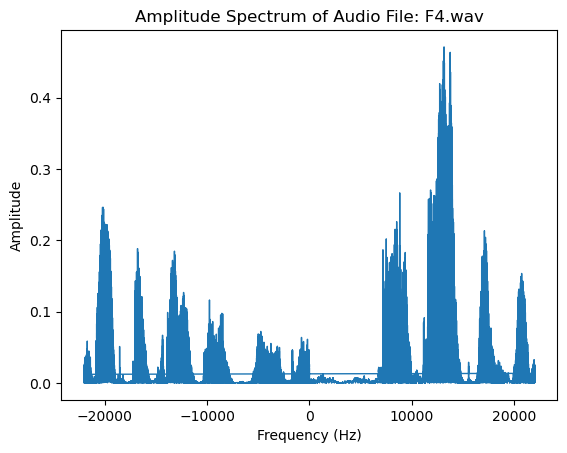

[82.0356369]


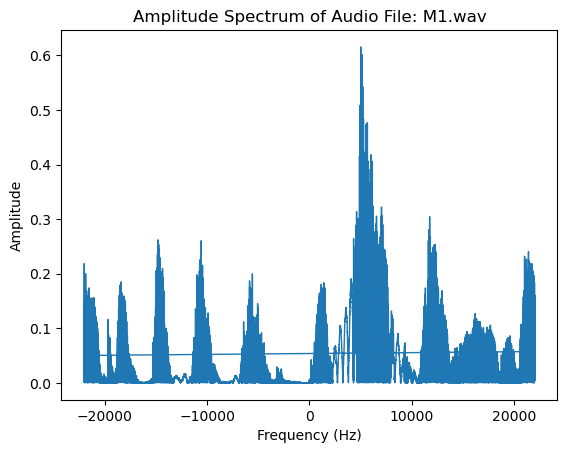

[81.4443532]


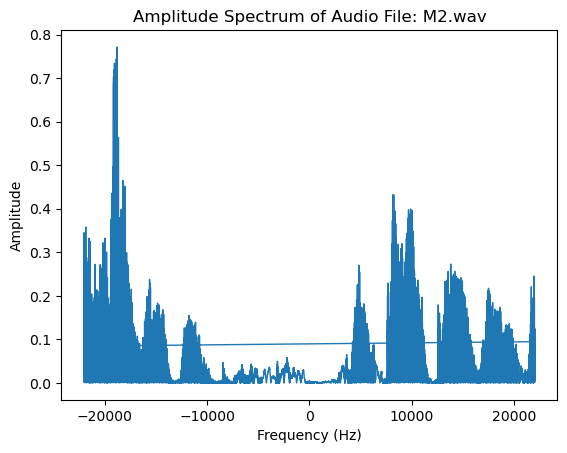

[84.70216573]


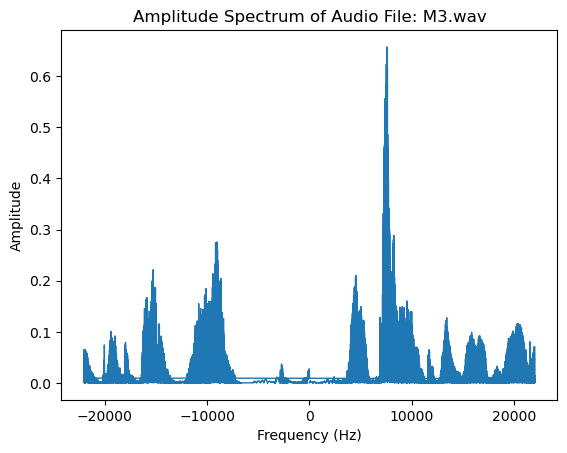

[82.65952709]


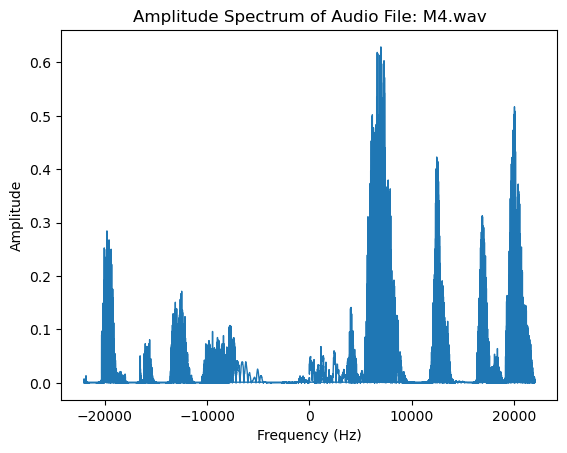

[79.758056]


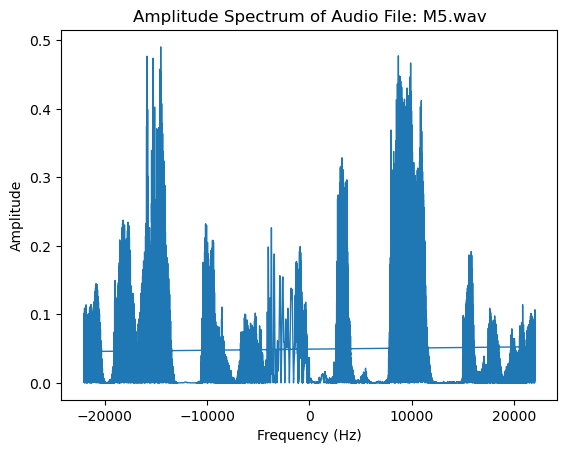

Ortalama: [81.55116184]
Data is too close to threshold
Kadın
Erkek
Kadın
Kadın
Data is too close to threshold
Erkek
Data is too close to threshold
Kadın
Erkek
Erkek
Kadın
['kadın', 'erkek', 'kadın', 'kadın', 'erkek', 'kadın', 'erkek', 'erkek', 'kadın']


In [109]:
# Ses dosyalarının bulunduğu klasörü belirtin
ses_klasoru = "CleanVoice"
cross_cntrl = []
cross_cntrl = FindTheGender(ses_klasoru)
print(cross_cntrl)

In [110]:
for i in range(len(cross_cntrl)):
    if cross_cntrl[i] != data2[i]:
        print(i)
        print("Data1: "+cross_cntrl[i])
        print("Data2: "+data2[i])

0
Data1: kadın
Data2: erkek
1
Data1: erkek
Data2: kadın
3
Data1: kadın
Data2: erkek
4
Data1: erkek
Data2: kadın


Elimizdeki veriler 2 farklı kontrol yöntemiyle kontrol edildiği zaman 2 sonuçta 4 veri için farklı sonuçlara karar verilmiştir.
çocuk sesleri üzerinden yapılan inceleme sonucu data set verileri de göz önünde bulundurulduğu zaman genlik spektrumu maksimum değeri üzerinden yapılan yorumların daha tutarlı olduğu görülebilmektedir. denemeler sırasında kullanılan 9 veride başarı oranı Spektrum Max değeri için %66.7 frekans değeri içinse %44.44 şeklinde hesaplanabilir. Tabi daha fazla data sağlanması durumunda bu oranlarda değişlik gözlenecektir.

belirlenen değerler arasında iki ölçümde threshold değerlerine yakın olan outputlarda uyarı vermektedir ve bu sistemler bir araya getirildiğinde zaman bu sonuçların yorumu yapıldığında daha tutarlı bir sistem kuralabilir.